# 3-1. kmeans clustering, agglomerative clustering with varying distance metrics
Baseline models. Statistical properties of cluters are shown. Representative time series of each clusters are obtained in order to compare results of effienct frontiers.

OUTPUT PATH: rts

In [ ]:
from utils.cluster_stats import get_stats, rank_matching
from utils.cluster_dist_plot import get_dist_plot, plot_annlr, plot_boxplot
from utils.cluster_rep_ts import get_rep_ts

## kmeans clustering with euclidean distance

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

In [ ]:
# filtered log return data for making cumulative filtered log return
df_lr_f = pd.read_csv("data/coin_log_return_filtered.csv")
df_cum_f = df_lr_f.cumsum(axis=0) # cumulative filtered log return data

# price data
price_data = pd.read_csv(f"data/coingecko_usd_price.csv").drop(columns=["uts"])
price_data = price_data.T

# log return data
lr_data = pd.read_csv(f"data/coin_log_return.csv")
lr_data = lr_data.T
lr_data = lr_data.drop(columns=[0]) # drop zero return

In [ ]:
# train data
trainX = np.array(df_cum_f.T)

model = KMeans(n_clusters=4, random_state=0)
model.fit(trainX)
labels = model.labels_

In [ ]:
# statistics dataframe
df_stat_R, df_stat_lr, annl_R, annl_lr, annl_lr_std, MDD = get_stats(labels, price_data, lr_data)

In [ ]:
# clusters' statistics
df_ranked_stat_lr = rank_matching(df_stat_lr)

In [ ]:
df_ranked_stat_lr

,cluster,log_return_mean[%],log_return_mean_std[%],log_return_median[%],log_return_std[%],log_return_std_std[%],skewness,kurtosis,mdd_mean[%],mdd_median[%],num_coins,common_cluster_label
2,2,435.131293,92.355871,479.404306,203.952326,33.465296,-0.318486,-1.339079,74.337923,74.571506,14,A
1,1,258.142525,75.148636,250.134769,165.747838,24.125416,0.843430,0.484587,72.188692,72.967857,36,B
3,3,106.192559,70.236850,108.661402,116.143150,59.685436,-0.130581,-0.849880,57.253656,69.393344,69,C
0,0,35.118406,42.608361,36.344516,137.879400,28.777504,0.831560,2.532595,73.979653,76.437454,27,D


In [ ]:
# clusters' annaulized log return distribution
df_dist_plot = get_dist_plot(df_ranked_stat_lr, annl_lr, annl_lr_std, MDD)

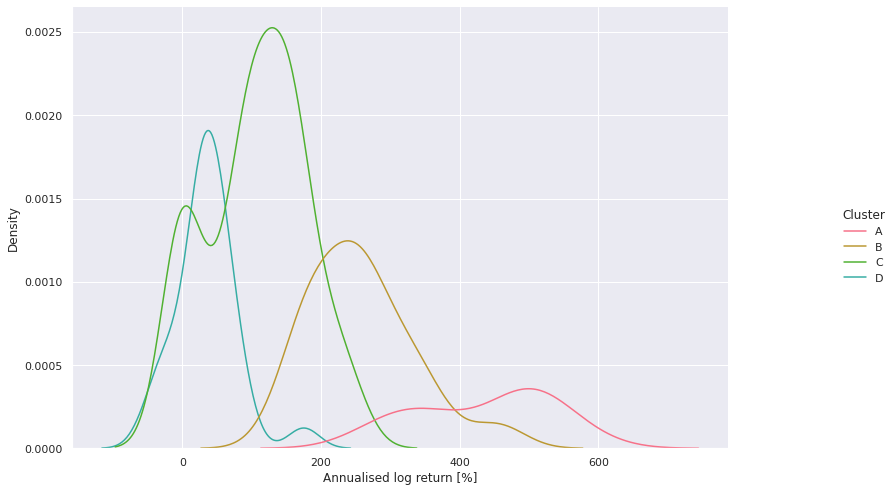

In [ ]:
plot_annlr(df_dist_plot)

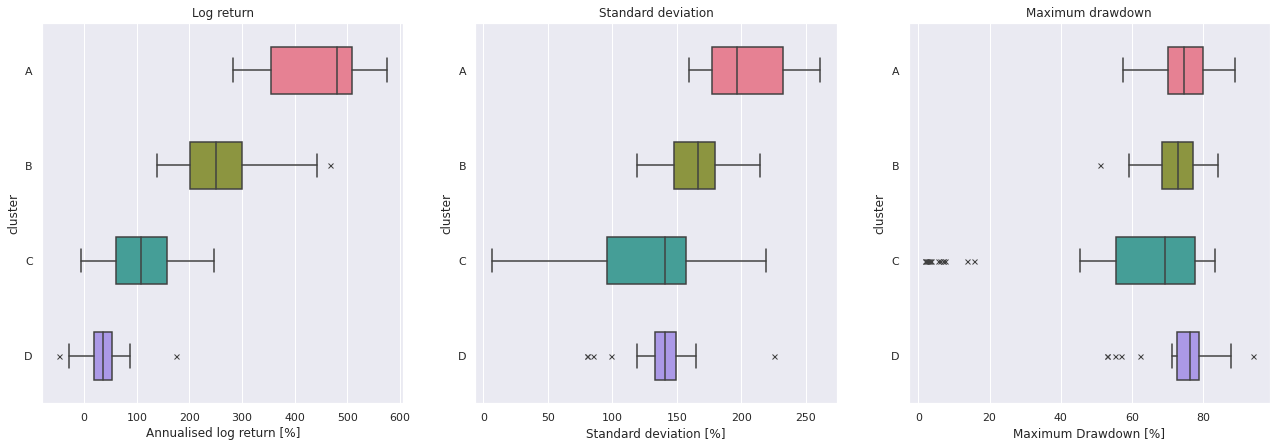

In [ ]:
# clusters' boxplot
plot_boxplot(df_dist_plot)

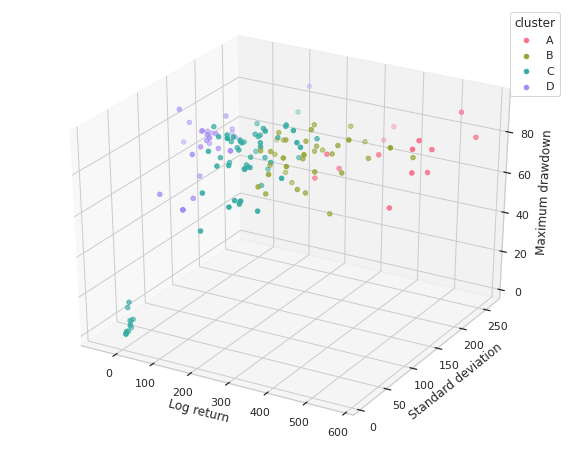

In [ ]:
# clusters' 3d plot
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

df = df_dist_plot.copy()

sns.set(style = "whitegrid")

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection = '3d')

x_a = df[df["common_cluster_label"]=="A"]["crypto_annualised_log_return[%]"]
y_a = df[df["common_cluster_label"]=="A"]["crypto_annualised_std[%]"]
z_a = df[df["common_cluster_label"]=="A"]["crypto_mdd[%]"]

x_b = df[df["common_cluster_label"]=="B"]["crypto_annualised_log_return[%]"]
y_b = df[df["common_cluster_label"]=="B"]["crypto_annualised_std[%]"]
z_b = df[df["common_cluster_label"]=="B"]["crypto_mdd[%]"]

x_c = df[df["common_cluster_label"]=="C"]["crypto_annualised_log_return[%]"]
y_c = df[df["common_cluster_label"]=="C"]["crypto_annualised_std[%]"]
z_c = df[df["common_cluster_label"]=="C"]["crypto_mdd[%]"]

x_d = df[df["common_cluster_label"]=="D"]["crypto_annualised_log_return[%]"]
y_d = df[df["common_cluster_label"]=="D"]["crypto_annualised_std[%]"]
z_d = df[df["common_cluster_label"]=="D"]["crypto_mdd[%]"]

# define and map colors
colors = sns.color_palette("husl",4).as_hex()

ax.set_xlabel("Log return")
ax.set_ylabel("Standard deviation")
ax.set_zlabel("Maximum drawdown")

s_a = ax.scatter(x_a, y_a, z_a, c=colors[0], label="A")
s_b = ax.scatter(x_b, y_b, z_b, c=colors[1], label="B")
s_c = ax.scatter(x_c, y_c, z_c, c=colors[2], label="C")
s_d = ax.scatter(x_d, y_d, z_d, c=colors[3], label="D")

# produce a legend with the unique colors from the scatter
# legend1 = ax.legend(*scatter.legend_elements(),
#                     loc="lower left", title="cluster")
# ax.add_artist(legend1)
ax.legend(title="cluster")

plt.show()

In [ ]:
# clusters' representative time series
df_ts = get_rep_ts(labels)

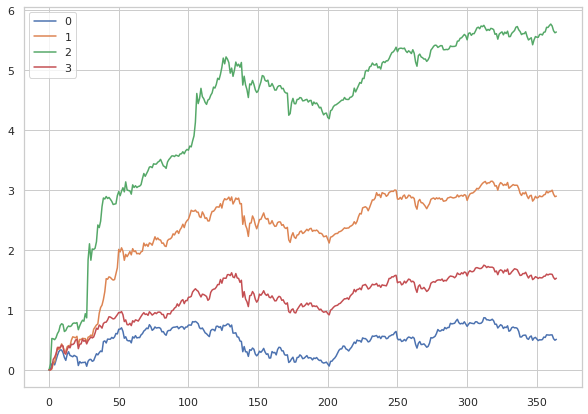

In [ ]:
df_ts.cumsum(axis=0).plot(figsize=(10,7))

In [ ]:
# save
df_ts.to_csv(f"rts/kmeans_eu_weighted_average_time_series.csv", index=False)

# agglo (eu) 군집 통계

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd

In [ ]:
# filtered log return data for making cumulative filtered log return
df_lr_f = pd.read_csv("data/coin_log_return_filtered.csv")
df_cum_f = df_lr_f.cumsum(axis=0) # cumulative filtered log return data

# price data
price_data = pd.read_csv(f"data/coingecko_usd_price.csv").drop(columns=["uts"])
price_data = price_data.T

# log return data
lr_data = pd.read_csv(f"data/coin_log_return.csv")
lr_data = lr_data.T
lr_data = lr_data.drop(columns=[0]) # drop zero return

In [ ]:
# train data
trainX = np.array(df_cum_f.T)

model = AgglomerativeClustering(n_clusters=4).fit(trainX)
labels = model.labels_

In [ ]:
# statistics dataframe
df_stat_R, df_stat_lr, annl_R, annl_lr, annl_lr_std, MDD = get_stats(labels, price_data, lr_data)
df_ranked_stat_lr = rank_matching(df_stat_lr)

In [ ]:
df_ranked_stat_lr

,cluster,log_return_mean[%],log_return_mean_std[%],log_return_median[%],log_return_std[%],log_return_std_std[%],skewness,kurtosis,mdd_mean[%],mdd_median[%],num_coins,common_cluster_label
2,2,435.131293,92.355871,479.404306,203.952326,33.465296,-0.318486,-1.339079,74.337923,74.571506,14,A
0,0,237.467209,81.712294,233.180658,163.274550,26.113438,0.737751,0.321637,72.075234,72.967857,44,B
3,3,96.788703,72.022369,97.900251,108.362187,59.797507,0.045055,-1.043508,54.513714,69.179713,58,C
1,1,50.210417,60.071072,41.431181,141.148541,33.190109,1.289684,2.335308,73.788002,76.520243,30,D


In [ ]:
df_dist_plot = get_dist_plot(df_ranked_stat_lr, annl_lr, annl_lr_std, MDD)

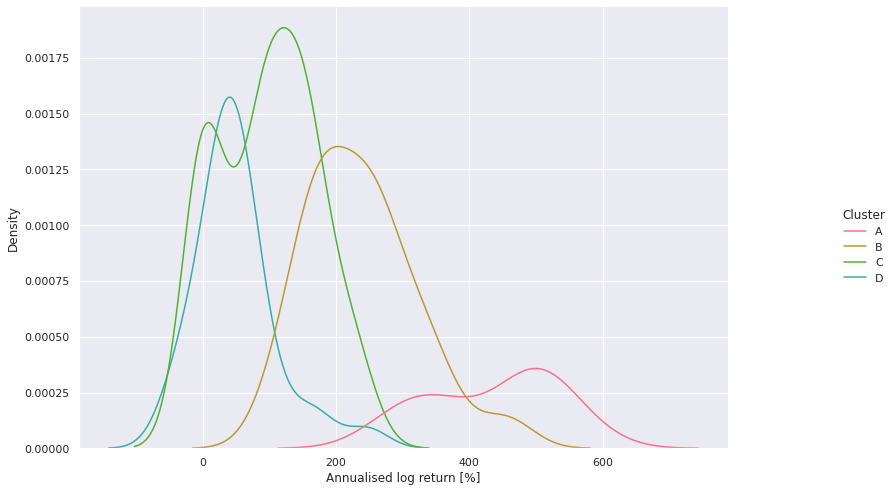

In [ ]:
plot_annlr(df_dist_plot)

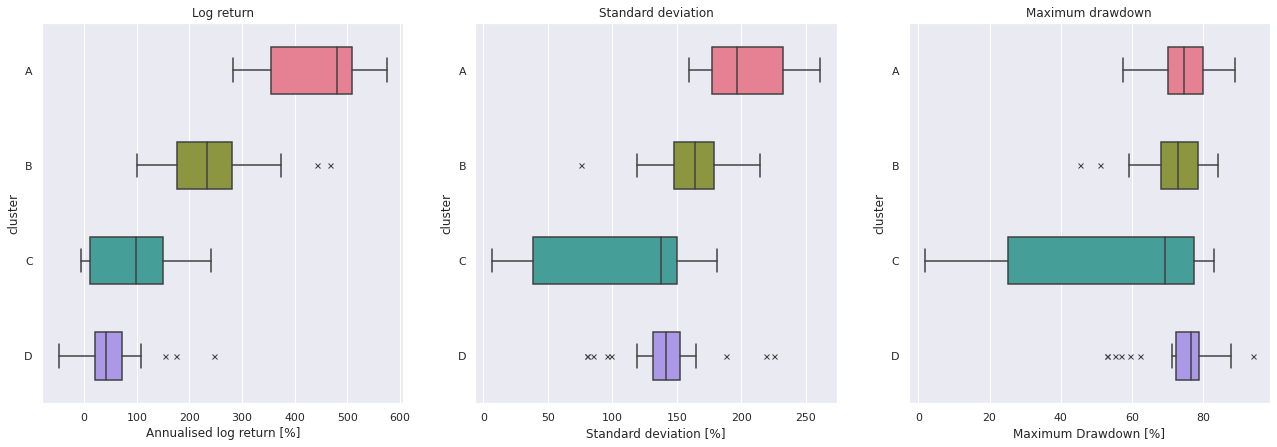

In [ ]:
plot_boxplot(df_dist_plot)

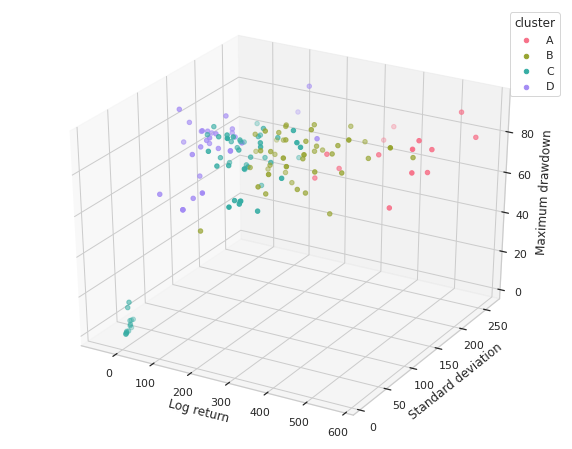

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

df = df_dist_plot.copy()

sns.set(style = "whitegrid")

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection = '3d')

x_a = df[df["common_cluster_label"]=="A"]["crypto_annualised_log_return[%]"]
y_a = df[df["common_cluster_label"]=="A"]["crypto_annualised_std[%]"]
z_a = df[df["common_cluster_label"]=="A"]["crypto_mdd[%]"]

x_b = df[df["common_cluster_label"]=="B"]["crypto_annualised_log_return[%]"]
y_b = df[df["common_cluster_label"]=="B"]["crypto_annualised_std[%]"]
z_b = df[df["common_cluster_label"]=="B"]["crypto_mdd[%]"]

x_c = df[df["common_cluster_label"]=="C"]["crypto_annualised_log_return[%]"]
y_c = df[df["common_cluster_label"]=="C"]["crypto_annualised_std[%]"]
z_c = df[df["common_cluster_label"]=="C"]["crypto_mdd[%]"]

x_d = df[df["common_cluster_label"]=="D"]["crypto_annualised_log_return[%]"]
y_d = df[df["common_cluster_label"]=="D"]["crypto_annualised_std[%]"]
z_d = df[df["common_cluster_label"]=="D"]["crypto_mdd[%]"]

# define and map colors
colors = sns.color_palette("husl",4).as_hex()

ax.set_xlabel("Log return")
ax.set_ylabel("Standard deviation")
ax.set_zlabel("Maximum drawdown")

s_a = ax.scatter(x_a, y_a, z_a, c=colors[0], label="A")
s_b = ax.scatter(x_b, y_b, z_b, c=colors[1], label="B")
s_c = ax.scatter(x_c, y_c, z_c, c=colors[2], label="C")
s_d = ax.scatter(x_d, y_d, z_d, c=colors[3], label="D")

# produce a legend with the unique colors from the scatter
# legend1 = ax.legend(*scatter.legend_elements(),
#                     loc="lower left", title="cluster")
# ax.add_artist(legend1)
ax.legend(title="cluster")

plt.show()

In [ ]:
df_ts = get_rep_ts(labels)

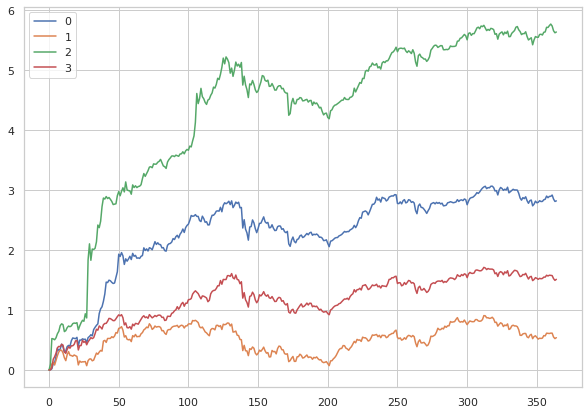

In [ ]:
df_ts.cumsum(axis=0).plot(figsize=(10,7))

In [ ]:
df_ts.to_csv(f"rts/agglo_eu_weighted_average_time_series.csv", index=False)

# agglo (dtw)

In [ ]:
pip install tslearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 875 kB 4.7 MB/s 


In [ ]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from tslearn.metrics.dtw_variants import cdist_dtw

In [ ]:
# filtered log return data for making cumulative filtered log return
df_lr_f = pd.read_csv("data/coin_log_return_filtered.csv")
df_cum_f = df_lr_f.cumsum(axis=0) # cumulative filtered log return data

# price data
price_data = pd.read_csv(f"data/coingecko_usd_price.csv").drop(columns=["uts"])
price_data = price_data.T

# log return data
lr_data = pd.read_csv(f"data/coin_log_return.csv")
lr_data = lr_data.T
lr_data = lr_data.drop(columns=[0]) # drop zero return

In [ ]:
# train data
trainX = np.array(df_cum_f.T)

model = AgglomerativeClustering(n_clusters=4, affinity=cdist_dtw, linkage="complete").fit(trainX)
labels = model.labels_

In [ ]:
df_stat_R, df_stat_lr, annl_R, annl_lr, annl_lr_std, MDD = get_stats(labels, price_data, lr_data)
df_ranked_stat_lr = rank_matching(df_stat_lr)

In [ ]:
df_ranked_stat_lr

,cluster,log_return_mean[%],log_return_mean_std[%],log_return_median[%],log_return_std[%],log_return_std_std[%],skewness,kurtosis,mdd_mean[%],mdd_median[%],num_coins,common_cluster_label
2,2,498.396308,34.800016,493.582708,205.834093,28.997178,0.591391,0.136605,76.450744,79.564294,10,A
1,1,324.190170,38.436400,329.880334,183.941494,32.191192,-0.066514,-0.443381,71.432257,73.338395,16,B
3,3,213.571515,40.558711,206.914787,159.754464,19.685029,0.048317,-1.181203,72.982860,73.969327,26,C
0,0,84.431781,70.943749,82.084350,121.317606,53.896873,0.291451,-0.802063,61.515945,72.517416,94,D


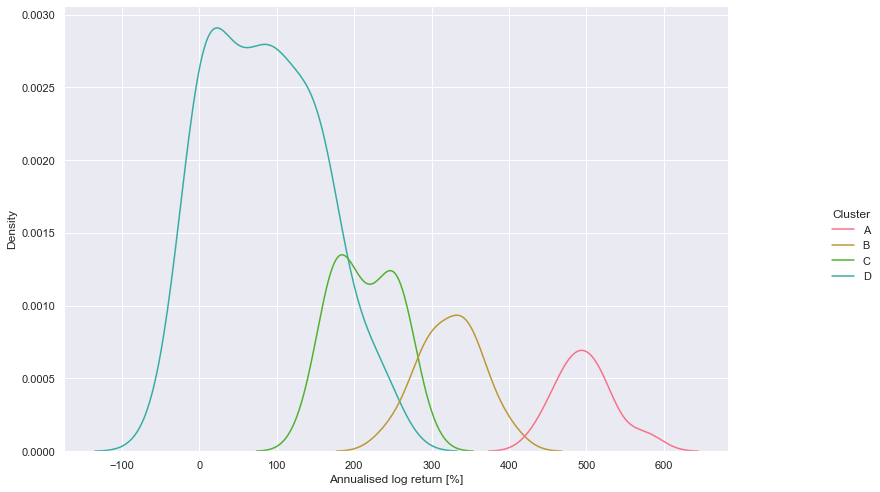

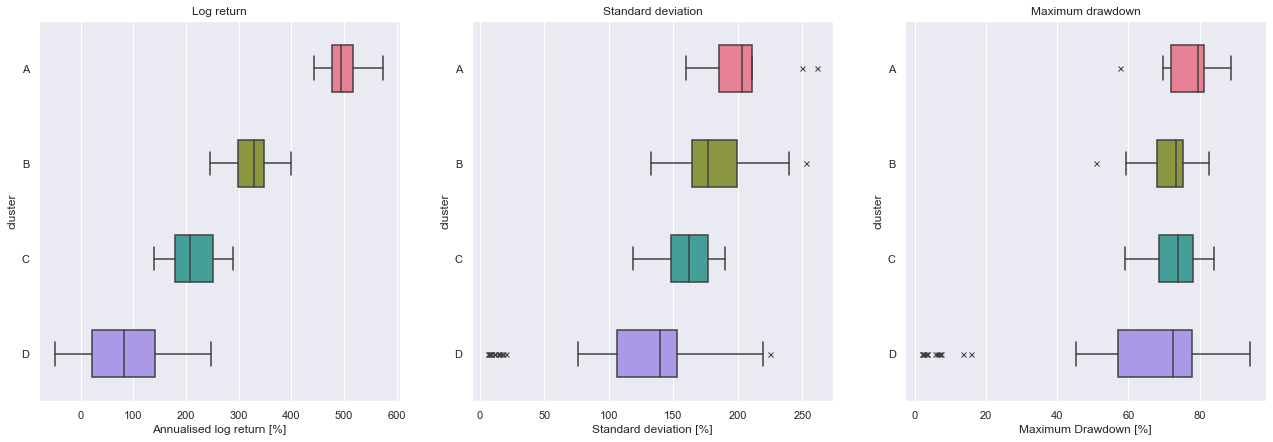

In [ ]:
df_dist_plot = get_dist_plot(df_ranked_stat_lr, annl_lr, annl_lr_std, MDD)
plot_annlr(df_dist_plot)
plot_boxplot(df_dist_plot)

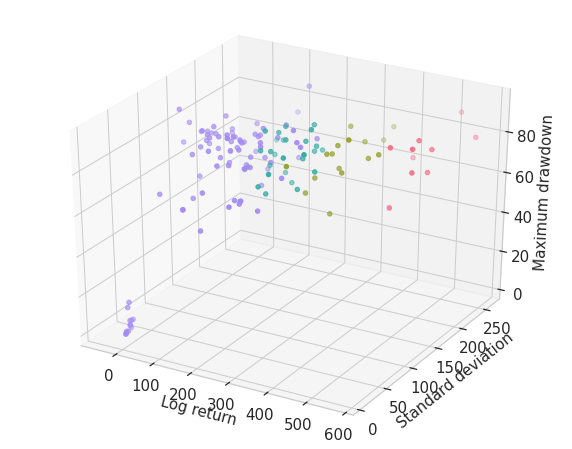

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

df = df_dist_plot.copy()

sns.set(style = "whitegrid")
fs = 15

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection = '3d')

x_a = df[df["common_cluster_label"]=="A"]["crypto_annualised_log_return[%]"]
y_a = df[df["common_cluster_label"]=="A"]["crypto_annualised_std[%]"]
z_a = df[df["common_cluster_label"]=="A"]["crypto_mdd[%]"]

x_b = df[df["common_cluster_label"]=="B"]["crypto_annualised_log_return[%]"]
y_b = df[df["common_cluster_label"]=="B"]["crypto_annualised_std[%]"]
z_b = df[df["common_cluster_label"]=="B"]["crypto_mdd[%]"]

x_c = df[df["common_cluster_label"]=="C"]["crypto_annualised_log_return[%]"]
y_c = df[df["common_cluster_label"]=="C"]["crypto_annualised_std[%]"]
z_c = df[df["common_cluster_label"]=="C"]["crypto_mdd[%]"]

x_d = df[df["common_cluster_label"]=="D"]["crypto_annualised_log_return[%]"]
y_d = df[df["common_cluster_label"]=="D"]["crypto_annualised_std[%]"]
z_d = df[df["common_cluster_label"]=="D"]["crypto_mdd[%]"]

# define and map colors
colors = sns.color_palette("husl",4).as_hex()

ax.set_xlabel("Log return", fontsize=fs)
ax.set_ylabel("Standard deviation", fontsize=fs)
ax.set_zlabel("Maximum drawdown", fontsize=fs)

s_a = ax.scatter(x_a, y_a, z_a, c=colors[0], label="A")
s_b = ax.scatter(x_b, y_b, z_b, c=colors[1], label="B")
s_c = ax.scatter(x_c, y_c, z_c, c=colors[2], label="C")
s_d = ax.scatter(x_d, y_d, z_d, c=colors[3], label="D")

# produce a legend with the unique colors from the scatter
# legend1 = ax.legend(*scatter.legend_elements(),
#                     loc="lower left", title="cluster")
# ax.add_artist(legend1)
# ax.legend(fontsize=fs)
plt.tick_params(axis='both', which='major', labelsize=fs)

plt.show()

In [ ]:
df_ts = get_rep_ts(labels)

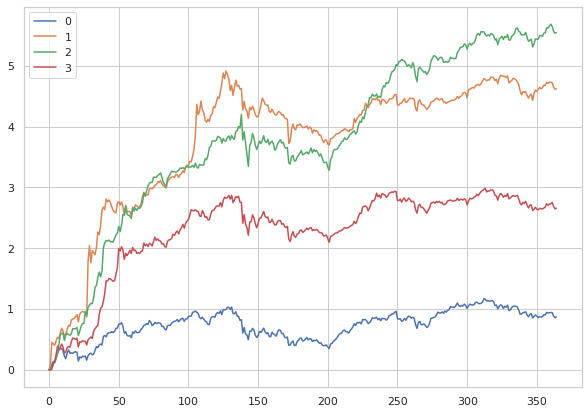

In [ ]:
df_ts.cumsum(axis=0).plot(figsize=(10,7))

In [ ]:
df_ts.to_csv(f"rts/agglo_dtw_weighted_average_time_series.csv", index=False)